### Linkedin Job Finder 

Objective:
Search available jobs opportunities posted at Linkedin sorting using criterias for exhibiting the most suitable items in
the top of the list. The job postings will be sorted according to the keywords entered by the user, displaying the
most relevant job postings on the top, relevancy is determined by the number of keywords that match with the job posting.

###  1. Using Selenium to search on Linkedin dynamically with the city

As using selenium multiple time on Linkedin can block the user , and some of us were blocked already ,  please ignore the selenium part when running the code , you can run it using the URL below


#-- 1 <<< Using Selenium to Perform the Search 

from selenium import webdriver
from selenium.webdriver.common.keys import Keys

print('Enter the region:')
region = input()

driver = webdriver.Chrome("C:/Users/ /chromedriver_win32/chromedriver.exe")
driver.get("https://www.linkedin.com/jobs/")
search_box = driver.find_element_by_name("location").clear()
search_box = driver.find_element_by_name("location")


search_box.send_keys(region)
search_box.send_keys(Keys.ENTER)
driver.minimize_window()
driver.maximize_window()

### 2.Defining the function that will read the entry of the user in Tkinter 

In [ ]:
#-- 2 <<< defining the function for user input:
def test_func(entry):
    global entrystr
    entrystr = str(entry)
    print(entrystr)

###  3.Web Scrapping and inserting dataframe into mangodb

#Basically in this step number 3,  we are creating different lists from the data Scrapped from linked in as below:
    listtitle=[]     #-- Job Title 
    listdate=[]      #-- Job Date 
    listlink=[]      #-- Job link (details) 
    listappl=[]      #-- Number of Applicants
    listcompany=[]   #-- List of companies names
    listregion=[]    #---List of Region
    listJobDesc=[]  #-- jobDescription 
    
Then based on user entry we use 2 lists to display the number of words matching and the words matching
    listmatch=[]     #-- number of words matched
    listwords=[]     #-- words matched 

In [7]:
#-- 3 <<< Web Scraping  (including job description)
def webscrapping(): 

    import requests
    from bs4 import BeautifulSoup as bs
    import re
    import pandas as pd
    
    from PIL import Image, ImageTk
    import tkinter as tk
    from pandastable import Table, TableModel

    #--- DataFrame on MongoDB
    from pymongo import MongoClient
    from bson.objectid import ObjectId
    
    client=MongoClient('localhost', 27017)
    db=client.jobs
    col=db.August_01
    #---- 

    entrylist=entrystr.split(' ')
    
    #url= driver.current_url
    ## use the above url if using Selenium or keep the below URL for the non use of Selenium.
    
    url="https://www.linkedin.com/jobs/search/?geoId=101591388&location=Kelowna%2C%20British%20Columbia%2C%20Canada"
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36'}
    jobs = requests.get(url, headers=headers)
    status=jobs.status_code
    jobs = bs(jobs.content, 'html.parser')
    print(status)


    #Get the total numer of results
    listSummary=[item.get_text() for item in jobs.find_all('label',class_='filter-list__list-item-label')]
    for i in range(0,len(listSummary)):
    
        if re.match('Any Time',listSummary[i]):
            resultsTot=int(re.findall('\d+', re.sub(",", "", listSummary[i]))[0])
            print("Total Jobs:", resultsTot)
        

    count=0
    listtitle=[]     #-- Job Title 
    listdate=[]      #-- Job Date 
    listlink=[]      #-- Job link (details) 
    listappl=[]      #-- Number of Applicants
    listcompany=[]   #List of companies names
    listregion=[]    #List of Region
    listmatch=[]     #-- number of words matched
    listwords=[]     #-- words matched 
    listJobDesc=[]  #-- jobDescription  

    while count<= resultsTot:     
        #-- Job Title 
        list1 = [item.get_text() for item in jobs.find_all('h3',class_='result-card__title job-result-card__title')]
        
    
        #-- Job Date Posted    
        list2 = [item.get('datetime') for item in jobs.find_all('time')] # ,class_='job-result-card__listdate')]
    
        #-- Job link      
        list3 = [item.get('href') for item in jobs.find_all('a')] #-- use Regex here: https://ca.linkedin.com/jobs/view/
    
        #-- Job company
        list4 = [item.get_text() for item in jobs.find_all('h4',class_='result-card__subtitle job-result-card__subtitle')]
    
        #-- Job region
        list5 = [item.get_text() for item in jobs.find_all('span',class_='job-result-card__location')]
    
        count=count+25
        
        for i in range(0,len(list1)):
            listtitle.append(list1[i])
            listdate.append(list2[i])        

        for i in range (0,len(list3)):
            x=list3[i][0:34]
            if re.match(r'https://ca.linkedin.com/jobs/view/', x) != None:
                listlink.append(list3[i]) 
                urldesc=list3[i]
            
                urldescF='https://www.linkedin.com/jobs/view/'+urldesc[34:]#+'&originalSubdomain=ca'
                jobsd = requests.get(urldescF, headers=headers)
                status=jobsd.status_code
                jobsd = bs(jobsd.content, 'html.parser')               
   
                #--- Get Number of Applicants 
                numAplicants=[itemx.get_text() for itemx in jobsd.find_all('span', class_='topcard__flavor--metadata topcard__flavor--bullet num-applicants__caption')]
                if len(numAplicants) > 0: 
                    nApplicants=numAplicants[0]
                else:
                    nApplicants='Less than 25 applicants'

                listappl.append(nApplicants) 

                #--- Get Job Description from the 2 different tags and conactenate them together: 
            
                listDesc=[item.get_text() for item in jobsd.find_all('ul')]+[item.get_text() for item in jobsd.find_all('p')] 
              
                
                KwordCount=0 
                kmatches=''
                
                for w in entrylist:  #-- List from the user 
                  
        
                    myre = re.compile(w.upper())
        
                    ix=0 
                    Kwordfound=0
                    while Kwordfound==0 and ix < len(listDesc):
                  
                        if (len(myre.findall(listDesc[ix].upper())) > 0):
                            KwordCount=KwordCount+1
                            Kwordfound=1
                            kmatches=kmatches+', '+w

                        ix=ix+1
      
                listmatch.append(KwordCount)   
                listwords.append(kmatches)   
                listJobDesc.append(listDesc)

        for i in range(0, len(list4)):
            listcompany.append(list4[i])
        
        for i in range(0, len(list5)):
            listregion.append(list5[i])

        print('1', len(listtitle))
    
        #url= driver.current_url
        ## use the above url if using Selenium or keep the below URL for the non use of Selenium.
        
        url="https://www.linkedin.com/jobs/search/?geoId=101591388&location=Kelowna%2C%20British%20Columbia%2C%20Canada"+"&start="+str(count)
        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36'}
        jobs = requests.get(url, headers=headers)
        jobs = bs(jobs.content, 'html.parser')
    
    # limiting the count to break after 50 jobs for a better performance
        if count == 50:
            break
            
            #-- Generating the complete dataframe (including job description)
            
    dataframe=pd.DataFrame()
    dataframe['JobTitle']  = listtitle
    dataframe['JobDate'] = listdate 
    dataframe['JobLink'] = listlink
    dataframe['Applicants'] = listappl 
    dataframe['Company'] = listcompany
    dataframe['Region'] = listregion
    dataframe['Num_Matches']  = listmatch
    dataframe['Words Matched'] = listwords
    dataframe['Job Desc'] = listJobDesc
 
    #--- Showing the top 20 jobs matched 
    
    df = dataframe[['JobTitle', 'Num_Matches', 'JobDate', 'JobLink','Applicants','Company','Words Matched']].sort_values(by='Num_Matches', ascending=False).head(20)
    
    #####
    #DataFrame -> Dictionary
    df1 = dataframe[['JobTitle', 'Num_Matches', 'JobDate', 'JobLink','Applicants','Company','Words Matched']]
    dataframe_dict = df1.to_dict('records')
    col.insert_many(dataframe_dict)
    
    
    entrylist=entrystr.split(' ')
    

    idlist=[]
    for i in range(0, len(entrylist)):
        for data in col.find({'JobTitle':{'$regex': entrylist[i], '$options':'i'}}, {'_id': 1, 'JobTitle':1})[:]:
            idlist.append(str(data['_id']))
           
 # Creating a list of unique Ids that have matching keywords with the keywords entered by user.
    idlist_unique = [idlist[0]]

    for j in range(1, len(idlist)):
        k=0
        while k < len(idlist_unique):
            if idlist[j] != idlist_unique[k]:
                if k < len(idlist_unique)-1:
                    k=k+1
                else:
                    idlist_unique.append(idlist[j])
            else:
                break

    print('Matched: ',len(idlist_unique))
    
    global col2
    col2=db.August_01_unique

    for l in range(0, len(idlist_unique)):
        for unique_data in col.find({'_id':ObjectId(idlist_unique[l])}, {'_id':0, 'job_description':0}):
            col2.insert_one(unique_data)
            
    # Creating dataframe2 df2 for the job title matching only.
    
    df_jobtitle=pd.DataFrame(list(col2.find()))
    df2=df_jobtitle.drop('Num_Matches', axis=1)
    df2=df_jobtitle.drop(['Num_Matches', 'Words Matched'], axis=1)
    
    #####
    
    pt = Table(lower_frame, dataframe=df,
                                    showtoolbar=True, showstatusbar=True)
    pt.show()
    
    pt2 = Table(lower_frame2, dataframe=df2,
                                    showtoolbar=True, showstatusbar=True)
    pt2.show()
    
    col.drop()
    

# 4. Using Tkinter Interface to show the results of the matching jobs

In [ ]:
import requests
from bs4 import BeautifulSoup as bs
import re
import pandas as pd
    
from PIL import Image, ImageTk
import tkinter as tk
#pip install pillow
from pandastable import Table, TableModel
global daframe



root = tk.Tk()
root.title('JobFinder')
canvas = tk.Canvas(root, height = 750, width = 1200)
canvas.pack()

def dropmongo():
    col2.drop()


bg_label = tk.Label(root)
bg_label.place(x=0,y=0,relwidth=1,relheight=1)

frame = tk.Frame(root, bg = '#1e29fc', bd= 5)
frame.place(relx=0.5,rely=0.1,relwidth = 0.75, relheight = 0.1, anchor='n')

entry = tk.Entry(frame, font = 50)
entry.place(relwidth = 0.65, relheight = 1)
           
button = tk.Button(frame, text="Search",  font = 50, command = lambda: [test_func(entry.get()), webscrapping(), dropmongo()])        
button.place(relx=0.7,relheight=1, relwidth = 0.3)

# This Navy colored box will include the result of the job description matching.
lower_frame = tk.Frame(root, bg='#0a4761', bd=10)
lower_frame.place(relx=0.5, rely=0.25, relwidth=0.75, relheight=0.3, anchor='n')


# This Red colored box will include the result of the job title matching
#######################################################################################3
lower_frame2 = tk.Frame(root, bg='red', bd=10)
lower_frame2.place(relx=0.5, rely=0.90, relwidth=0.75, relheight=0.3, anchor='s')
#########################################################################################

label = tk.Label(lower_frame, anchor = "nw", justify = 'left')
label.place(relwidth=1, relheight=1)

##########################################################################################
label2 = tk.Label(lower_frame2, anchor = "nw", justify = 'left')
label2.place(relwidth=1, relheight=1)
#############################################################################################

exit_button = tk.Button(root, text='Exit',font = 50, command=root.destroy)
exit_button.pack()
  

root.mainloop()


# How to enter your search in Tkinter

After running the above call , the Tkinter interface will be shown as below , please enter your search as below.
Here using an example Data Analyst , and then click on Search



In [ ]:
# Please note that:
# Navy colored box = result of the job description matching.
# Red colored box = result of the job title matching

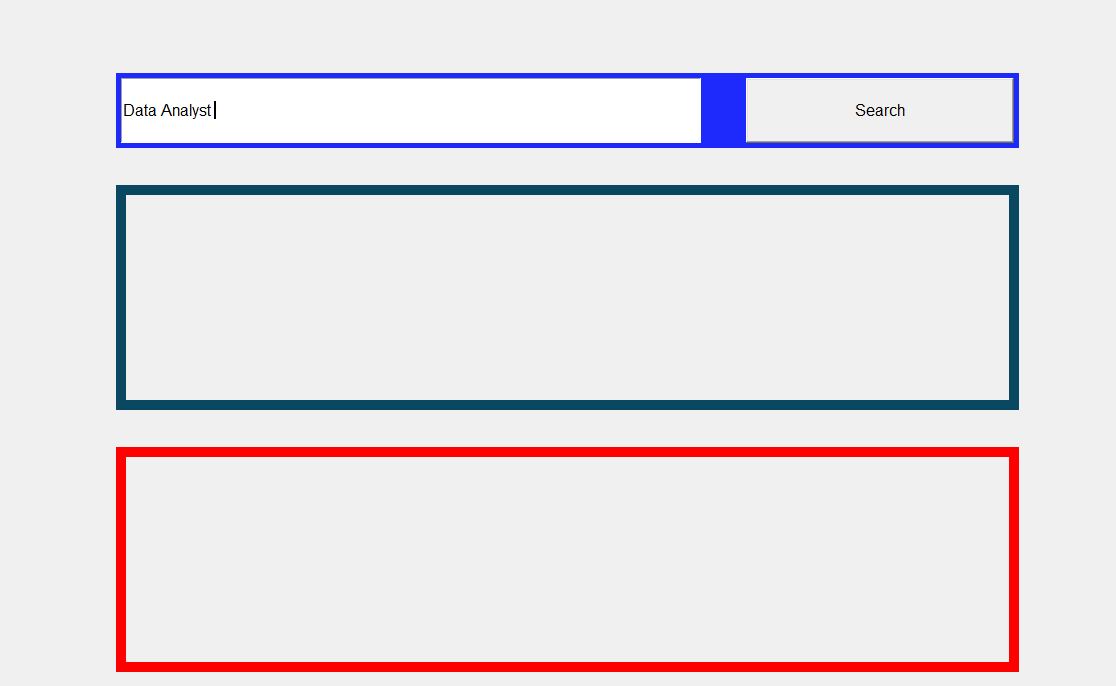

After clicking Search , the results will be displayed as below, please just zoom in , using the green "+ button" on the right bottom of the 2 tables. 

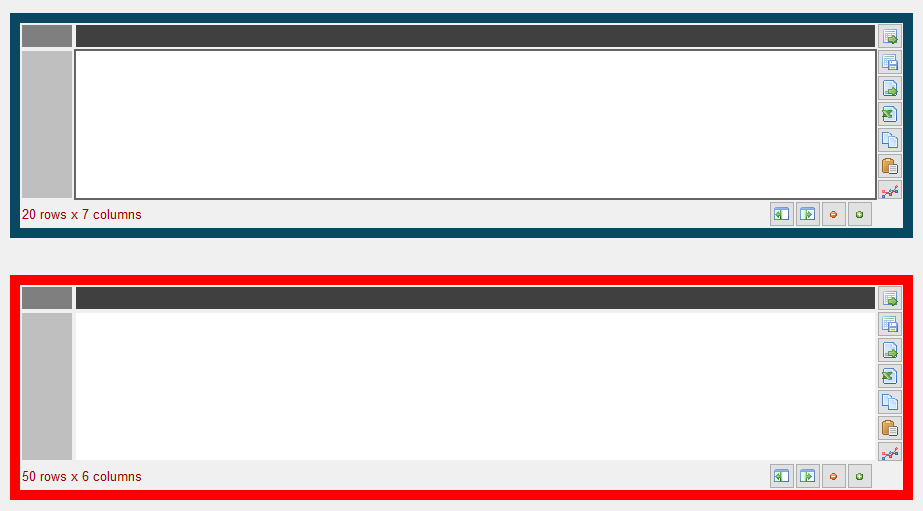

After zooming in using the button on the buttom of the right hand side , the results 
of the jobs matching will be displayed as below:

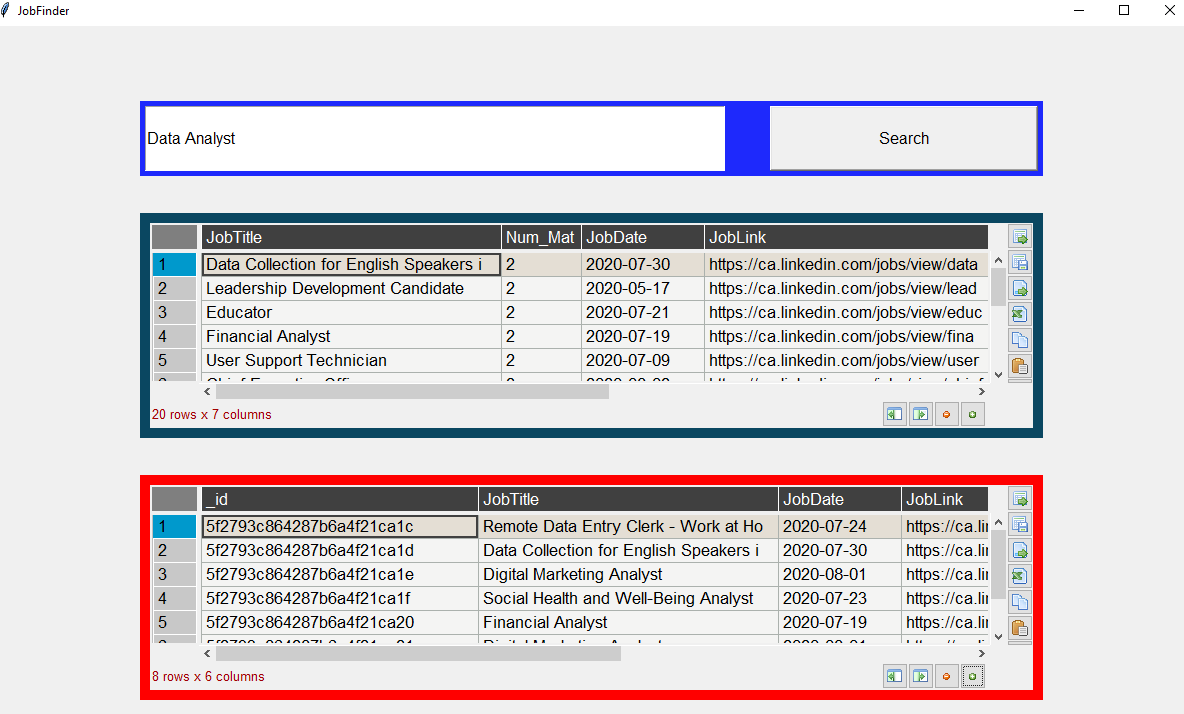

You can perform a dynamic search on others keywords matching using the same window ,
now enter the new keywords for example here , using Project Manager

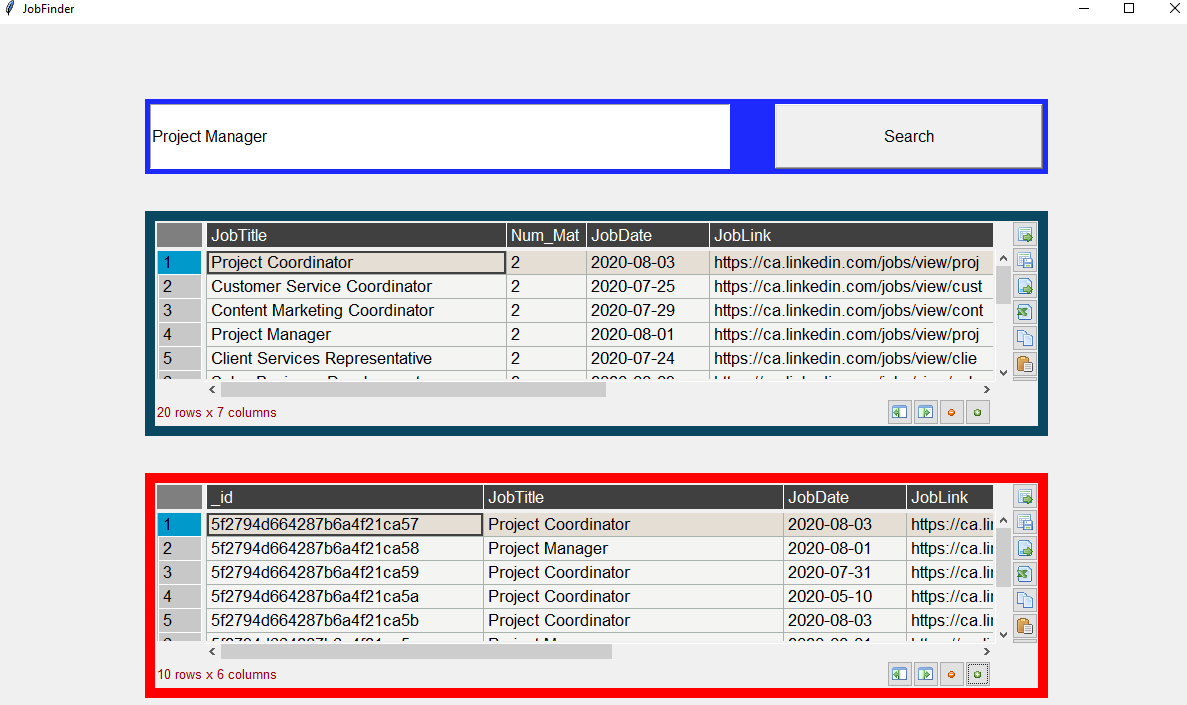